## Dimensionality reduction and manifold learning
* Today we are going to learn how to visualize and explore the data
![intro](http://sarahannelawless.com/wp-content/uploads/2015/03/tw-1-600x449.jpg)

In [33]:
from time import time
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### Load the MNIST digits dataset

In [34]:
from sklearn.datasets import load_digits
digits = load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape


In [35]:
print X.shape
print y.shape

(1797, 64)
(1797,)


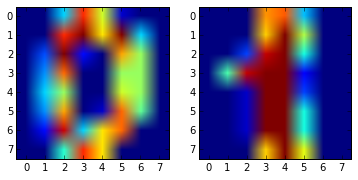

In [36]:
# a few testimonials
plt.subplot(1,2,1)
plt.imshow(X[0].reshape(8,8))
plt.subplot(1,2,2)
plt.imshow(X[1].reshape(8,8))

### Visualize the data
We shall start with a random projection

In [37]:
from matplotlib import offsetbox
def plot_embedding(X,y,ax=None,show_images=True,min_dist=1e-2):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if not show_images:
        return
    if ax is None:
        ax = plt.subplot(1,1,1)
        
    shown_images = np.array([[1., 1.]])  # just something big
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < min_dist: continue
        shown_images = np.r_[shown_images, [X[i]]]
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
            X[i])
        ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])


In [38]:
from sklearn.random_projection import GaussianRandomProjection

Xrp = GaussianRandomProjection(n_components=2).fit_transform(X)

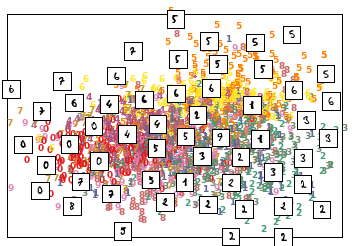

In [39]:
plot_embedding(Xrp,y)

Re-running a few times will yield different outcomes

### Principial component analysis
* The PCA is basically equivalent to eigenvector basis transformation of the data.
* The only difference is that we now take top-N first components of eigendecomposition

In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=2)
Xpca = pca.fit_transform(X)

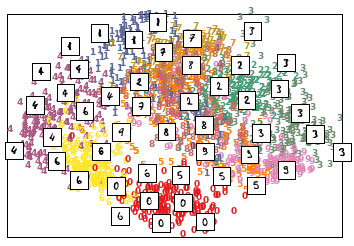

In [42]:
plot_embedding(Xpca[:,:2],y)

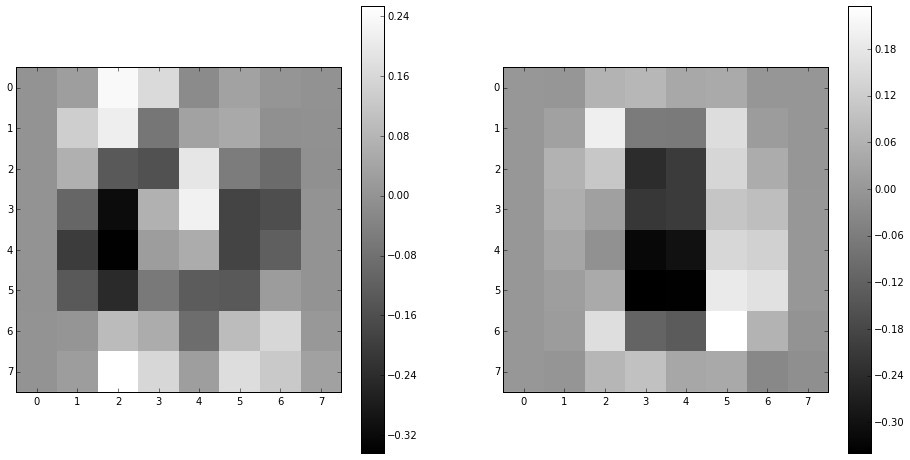

In [12]:
n = pca.n_components
plt.figure(figsize=[16,8])
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(pca.components_[i].reshape(8,8),
              cmap='gray',interpolation='none')
    plt.colorbar()


### SVD

SVD decomposition is similar to PCA 

In [43]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /root/miniconda/envs/rep_py2/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /root/miniconda/envs/rep_py2/lib/python2.7/site-packages (from sklearn)


In [46]:
from sklearn.decomposition import TruncatedSVD
svd = <create SVD>
Xsvd = <make SVD transformation of X data>

SyntaxError: invalid syntax (<ipython-input-46-948276309ebb>, line 2)

In [47]:
plot_embedding(Xsvd,y)

NameError: name 'Xsvd' is not defined

# LDA projection

* The Linear Discriminant Analysis is also a linear method, but unlike SVD or PCA it is a supervised classification method with data decomposition being a side effect

In [16]:
!pip install --upgrade pip

    100% |################################| 1.2MB 1.1MB/s 
  Found existing installation: pip 8.1.1
    Uninstalling pip-8.1.1:
      Successfully uninstalled pip-8.1.1


In [19]:
!pip install --upgrade sklearn

Requirement already up-to-date: sklearn in /root/miniconda/envs/rep_py2/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /root/miniconda/envs/rep_py2/lib/python2.7/site-packages (from sklearn)


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
Xlda = lda.fit_transform(X,y)

ImportError: cannot import name check_classification_targets

In [ ]:
plot_embedding(Xlda,y)

##### Hard mode enabled

#### Please go to "load the mnist dataset" cell and change n_class to 10.

##### Re-run all the tabs and re-evaluate the methods

# Embedding methods

* Unlike linear/quadratic/rbf decomposition methods, embeddings are not bound to any function basis.

* Instead, these methods try to "assign" coordinates to each point, so that some measure of "fitness" is maximized.

### Multidimensional Scaling

* One of the first manifold learning methods.
* Core idea: map high-dimensional data to 2D space while trying to preserve distances as well as possible
* Fitness: euclidian difference between embedded points must be as close to distance between original points as possible

In [32]:
from sklearn.manifold import MDS
mds = MDS(n_components=2,verbose=2,n_init=1)
Xmds = mds.fit_transform(X)

ImportError: cannot import name FLOAT_DTYPES

In [ ]:
plot_embedding(Xmds,y)

# t-SNE
t-distributed Stochasitc Neiborhood Embedding

* Conceptually similar to MDS, but only pays attention to nearest points in the hi-dim space.
* Tries to embed close points to close coordinates, while ignoring distance between far points.



* In other words, tSNE tries to preserve low-level structure of the space while ignoring high-level structure.

In [31]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,verbose=2,perplexity=10)
Xtsne = tsne.fit_transform(X)

ImportError: cannot import name FLOAT_DTYPES

In [30]:
plot_embedding(Xtsne,y)

NameError: name 'Xtsne' is not defined

# Finished early?
 * See how tSNE results change when you change perplexity from 1 to 100
   * Do not take every integer value for the sake of CPU costs
   * some 10 points like [1,5,...50,100] is probably fine
   
   
 * Try computing tSNE embedding over PCA-transformed data
   * For example, take 16-component PCA and apply TSNE to it
 
 
 * Try Isomap, LocallyLinearEmbedding and SpectralEmbedding
   * Both are in sklearn.manifold
   * See if it is possible to produce tSNE-like results

In [ ]:
<compare tSNEs>

In [ ]:
<Isomap, LLE and Spectral Embedding>